In [161]:
import sys

sys.path.append("...")

import Essentials

In [162]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [163]:
data_archive = np.load('Data_First_newest.npz', allow_pickle=True)

In [164]:
def prepare_Y(y):
    timestamp = y[:, 1]   
    y = y[:, 0].reshape(len(y), 1)
    y = y.astype(np.float64)

    return y, timestamp

In [165]:
all_X_1 = data_archive['all_X_1']
all_Y_1 = data_archive['all_Y_1']

all_X_2 = data_archive['all_X_2']
all_Y_2 = data_archive['all_Y_2']

all_X_3 = data_archive['all_X_3']
all_Y_3 = data_archive['all_Y_3']

In [166]:
x_train, x_test, y_train, y_test = train_test_split(all_X_1, all_Y_1, test_size=0.25, random_state=42)

In [167]:
y_train, timestamp_train = prepare_Y(y_train)

In [168]:
y_test, timestamp_test = prepare_Y(y_test)

In [169]:
all_X_1.shape
all_Y_1.shape
x_train.shape
y_test.shape

(33, 1)

In [170]:
class kNN(Essentials.SoftSensor):
    def __init__(self, x_train, y_train, **kwargs):
        super().__init__('Test')
        self.parameters = kwargs
        self.model = KNeighborsRegressor(**self.parameters)
        self.x_scaler = StandardScaler() 
        self.y_scaler = StandardScaler()
        self.x_scaler.fit(x_train)
        self.y_scaler.fit(y_train)
        self.train(x_train, y_train)

    def preprocessing(self, x):
        try:
            return self.x_scaler.transform(x)
        except:
            try:
               return self.y_scaler.transform(x)
            except BaseException as err:
                print("Ошибка скейлера")
                raise err
    def postprocessing(self, x):
        return x
                
    def evaluate_model(self, x):
        predictions = self.get_model().predict(x)
        return predictions.reshape(-1, 1)

    def train(self, x_train, y_train):
        x_train = self.preprocessing(x_train)
        self.model.fit(x_train, y_train)
        self.set_model(self.model)
        
    def __str__(self):
        pass
    def predict(self, x):
        return self.evaluate_model(self.preprocessing(x))

In [171]:
test_soft_sensor = kNN(x_train, y_train, n_neighbors=3, weights='distance', algorithm = 'ball_tree', metric = 'minkowski', p = 2)

In [172]:
metric = Essentials.R2Metric()

In [173]:
test_soft_sensor.test(x_test, y_test, metric)

(array([[55.54813144],
        [57.47061634],
        [57.07021083],
        [57.71008812],
        [61.45590299],
        [55.10672347],
        [59.49225738],
        [51.1094398 ],
        [61.56985739],
        [58.28248876],
        [54.42634524],
        [58.66393238],
        [58.7319043 ],
        [51.90861883],
        [52.95407704],
        [51.90753568],
        [58.66117947],
        [61.88352875],
        [56.64902992],
        [58.86238959],
        [58.01041693],
        [55.44520412],
        [60.12136389],
        [58.07175115],
        [58.38943132],
        [61.24369728],
        [59.62591579],
        [56.4650898 ],
        [60.79522235],
        [52.7443179 ],
        [57.22566768],
        [59.1904078 ],
        [55.25169752]]),
 0.7113858966979765)

In [174]:
test_visual = Essentials.Visualizer(x_test, y_test, timestamp_test, [metric], 'kNN SoftSensor R2 metric on Test')

      Coefficient of determination
Test                      0.711386


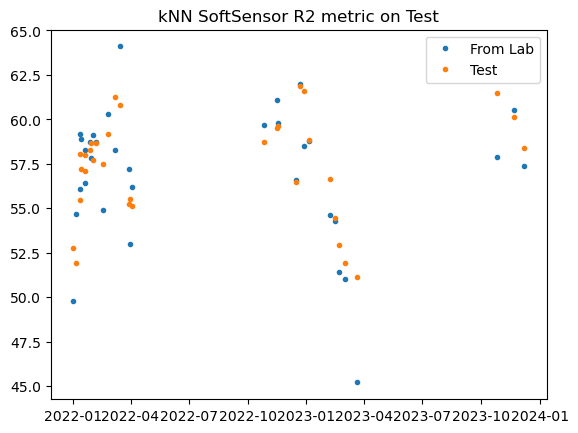

In [175]:
test_visual.visualize([test_soft_sensor])